# **Question 1**
Apply Linear Regression to the provided dataset using underlying steps.

a. Import the given “Salary_Data.csv”

b. Split the data in train_test partitions, such that 1/3 of the data is reserved as test subset.

c. Train and predict the model.

d. Calculate the mean_squared error

e. Visualize both train and test data using scatter plot.

In [1]:
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [5]:
#Importing the dataset(reading dalary_data.csv) and extracting the independent and Dependent Variables
salaries = pd.read_csv("Salary_Data.csv")
X = salaries.iloc[:, :-1].values
Y = salaries.iloc[:,1].values

salaries.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


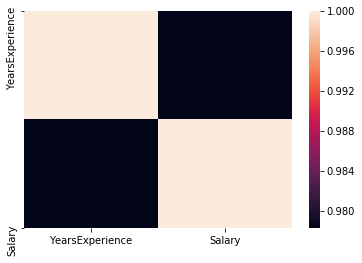

In [6]:
#Data Visualization
#Building Correlation Matrix
sns.heatmap(salaries.corr())

In [7]:
#Splitting the dataset into training set and test set
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, cross_validate

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 1/3, random_state = 0)

In [8]:
#Fitting multiple linear regression to the training set
from sklearn.linear_model import LinearRegression
lnregressor = LinearRegression()
lnregressor.fit(X_train, Y_train)

LinearRegression()

In [11]:
#Predicitng the test set results
Y_pred = lnregressor.predict(X_test)
print(Y_pred)

[ 40835.10590871 123079.39940819  65134.55626083  63265.36777221
 115602.64545369 108125.8914992  116537.23969801  64199.96201652
  76349.68719258 100649.1375447 ]


In [12]:
#Calculate the mean_squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test,Y_pred)

21026037.329511296

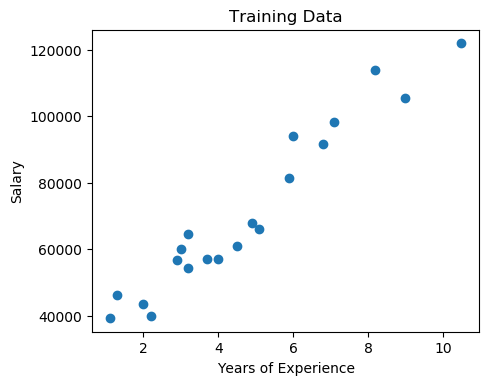

In [19]:
#Visualize both train and test data using scatter plot.

#Training data visulaization
plt.rcParams.update({'figure.figsize':(5,4), 'figure.dpi':100})
plt.title('Training Data')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.scatter(X_train, Y_train)
plt.show()

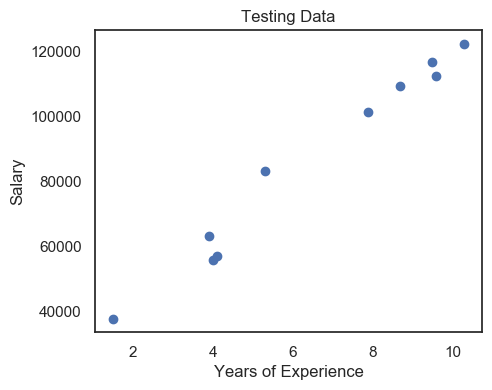

In [26]:
#Testing data visulaization using scatter plot
plt.rcParams.update({'figure.figsize':(5,4), 'figure.dpi':100})
plt.title('Testing Data')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.scatter(X_test, Y_test)
plt.show()

#Question 2

Apply K means clustering in the dataset provided:

• Remove any null values by the mean.

• Use the elbow method to find a good number of clusters with the K-Means algorithm 

• Calculate the silhouette score for the above clustering

In [27]:
#Import the libraries
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", color_codes=True)
import warnings
warnings.filterwarnings("ignore")

In [28]:
dataset = pd.read_csv('K-Mean_Dataset.csv')
dataset.head()


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [29]:
#Remove any null values by the mean.
gfg = pd.DataFrame(dataset)
# using isnull() function and check for any null values
gfg.isnull()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8946,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
8947,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8948,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [30]:
dataset.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [31]:
dataset.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [32]:
#Data Analytics
dataset = dataset.iloc[:,1:]
dataset['MINIMUM_PAYMENTS'] = dataset['MINIMUM_PAYMENTS'].fillna(np.mean(dataset['MINIMUM_PAYMENTS']))
dataset['CREDIT_LIMIT'] = dataset['CREDIT_LIMIT'].fillna(np.mean(dataset['CREDIT_LIMIT']))
dataset.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

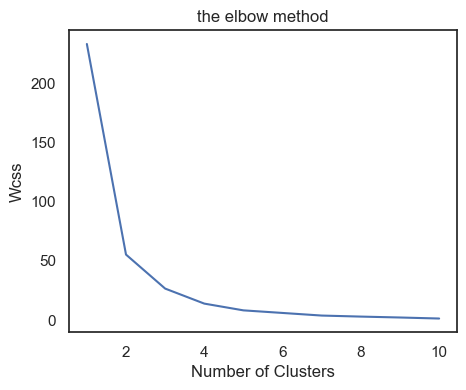

In [33]:
##determining K values using elbow method to know the number of clusters
wcss = []

for i in range(1,11):
     kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
     kmeans.fit(X)
     wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('the elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('Wcss')
plt.show()

In [34]:
#detemining K values Using Distortion and Inertias methods
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 11)
  
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
  
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
  
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

In [35]:

for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 2.3826666666666663
2 : 1.134
3 : 0.8113131313131313
4 : 0.574952380952381
5 : 0.4621481481481482
6 : 0.40214814814814814
7 : 0.3062222222222222
8 : 0.2528888888888889
9 : 0.20288888888888876
10 : 0.1619999999999999


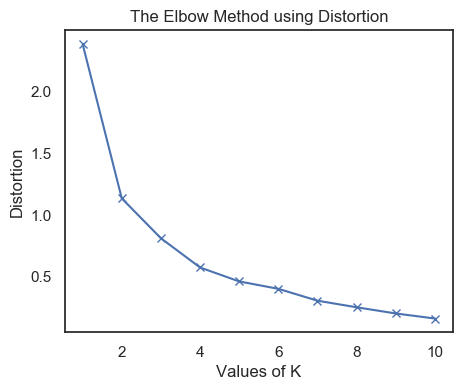

In [36]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [37]:

for key, val in mapping2.items():
    print(f'{key} : {val}')

1 : 233.55466666666663
2 : 55.362
3 : 26.70581818181818
4 : 13.876035714285715
5 : 8.158555555555557
6 : 5.567722222222224
7 : 3.896333333333332
8 : 2.8963333333333328
9 : 1.972166666666665
10 : 1.2128333333333319


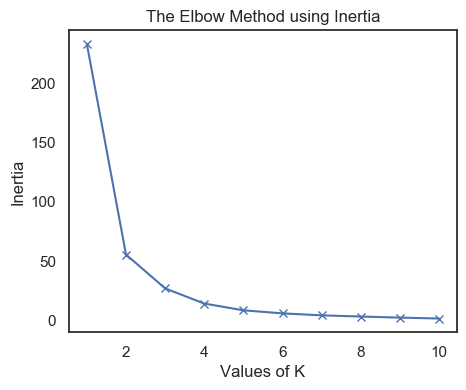

In [39]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

As the Values of K at elbow is 4 i.e. the point where distortion/inertia start decreasing in a linear fashion, thus optimal number of clusters for the data is 4.

In [ ]:
from sklearn.cluster import KMeans
nclusters = 4 # this is the k in kmeans
km = KMeans(n_clusters=nclusters)
km.fit(X)

KMeans(n_clusters=4)

In [ ]:
# predict the cluster for each data point
y_cluster_kmeans = km.predict(X)
#Calculate the silhouette score for the above clustering
from sklearn import metrics
score = metrics.silhouette_score(X, y_cluster_kmeans)
print("the Silhouette Score", score)

the Silhouette Score 0.4664028165053024


Question 3

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_dataset = pd.DataFrame(scaler.fit_transform(dataset), columns=dataset.columns)
scaled_dataset.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960433,-0.528979,-3.109675e-01,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688639,0.818642,8.931021e-02,0.234227,0.36068
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826062,-0.383805,-1.016632e-01,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826062,-0.598688,-5.366135e-16,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905464,-0.364368,-2.657913e-01,-0.525551,0.36068


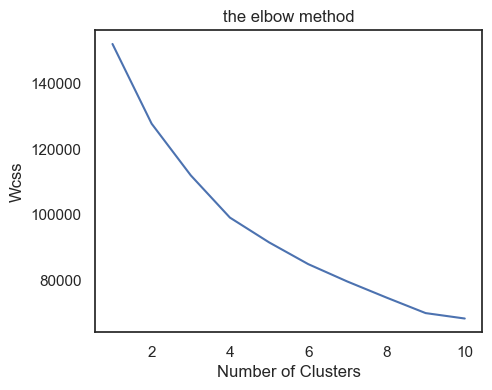

In [41]:
##determining K values using elbow method to know the number of clusters
scaled_wcss = []

for i in range(1,11):
     kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
     kmeans.fit(scaled_dataset)
     scaled_wcss.append(kmeans.inertia_)

plt.plot(range(1,11),scaled_wcss)
plt.title('the elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('Wcss')
plt.show()

In [44]:
scaled_clusters = 4 # this is the k in kmeans
km = KMeans(n_clusters=4)
km.fit(scaled_dataset)

KMeans(n_clusters=4)

In [45]:
# predict the cluster for each data point
scaled_y_cluster_kmeans = km.predict(scaled_dataset)
#Calculate the silhouette score for the above clustering
score = metrics.silhouette_score(scaled_dataset, scaled_y_cluster_kmeans)
print("the Silhouette Score", score)

the Silhouette Score 0.1976074492720698


Comparing both Silhouette’s score obtained i.e, 0.4664028165053024
And 0.1976074492720698, it is evident that the value that is near to 1 is clearly best. Thus the score did not improve.
